In [1]:
import numpy as np
import pandas as pd
from gators.util import util
from gators.util import benchmark
import matplotlib.pyplot as plt
import matplotlib

In [2]:
housing_file_location="data/house_prices.parquet"
sf_crime_file_location="data/sf_crime.parquet"
titanic_file_location="data/titanic.parquet"

In [3]:
housing_df = pd.read_parquet(housing_file_location)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
sf_crime_df = pd.read_parquet(sf_crime_file_location)
sf_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dates       5000 non-null   object 
 1   Category    5000 non-null   object 
 2   Descript    5000 non-null   object 
 3   DayOfWeek   5000 non-null   object 
 4   PdDistrict  5000 non-null   object 
 5   Resolution  5000 non-null   object 
 6   Address     5000 non-null   object 
 7   X           5000 non-null   float64
 8   Y           5000 non-null   float64
dtypes: float64(2), object(7)
memory usage: 390.6+ KB


In [5]:
titanic_df = pd.read_parquet(titanic_file_location)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [3]:
def plot_all(bench_dict, name='test'):
    # key = list(bench_dict.keys())[-1]
    # val = bench_dict[key]
    # columns = (val['pandas']/val['numpy']).sort_values().index
    # print(columns)
    N=len(bench_dict.items())
    i=0
    transformer=""
    fig, ax = plt.subplots(1, 2, figsize=[18, 8],tight_layout=True)
    plt.subplots_adjust(wspace=0.1)
    dfs=[]
    for key, value in bench_scalers.items():
        df = value.copy()
        df.index = [key]
        dfs.append(df)
        transformer = str(value.index[0]).split('_')[0]
    final_df = pd.concat(dfs)
    (final_df*1e-3).plot.bar(
        ax=ax[0],
        rot=0,
        color=['#c73d22', '#0077ea'],
        logy=True,
        ylabel='runtime (s)',
        xlabel='# of columns',
        ylim=[1e-6, 1],
        width=0.75,
        figsize=[7*1.60, 5],
        legend=True,
        fontsize=14)
    (final_df['pandas']/final_df['numpy']).plot.bar(
        ax=ax[1],
        rot=0,
        color=['#0077ea'],
        legend=False,
        ylabel='runtime speed-up',
        xlabel='# of columns',
        figsize=[7*1.60, 5],
        width=0.75,
        fontsize=14)
    ax[1].xaxis.label.set_fontsize(14)
    ax[0].xaxis.label.set_fontsize(14)
    ax[1].yaxis.label.set_fontsize(14)
    ax[0].yaxis.label.set_fontsize(14)


    ax[1].set_ylabel('runtime speed-up', labelpad=-25)
    matplotlib.rcParams['legend.fontsize'] = 12
    
    for p in ax[1].patches:
        ax[1].annotate(
            f'{round(p.get_height())}X',
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10), textcoords='offset points', fontsize=14)

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].get_yaxis().set_ticks([])
    ax[1].yaxis.label.set_fontsize(14)
    ax[1].xaxis.label.set_fontsize(14)
    title = f'''{transformer}'''
    plt.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.savefig(name+".jpg")
    plt.show()
    plt.close(fig)

In [4]:
n_vec = [1, 10, 100]

In [6]:
# DropHighCardinality
from gators.data_cleaning import DropHighCardinality
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropHighCardinality(max_categories=3)]
columns = ["Category", "Address", "Resolution"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)

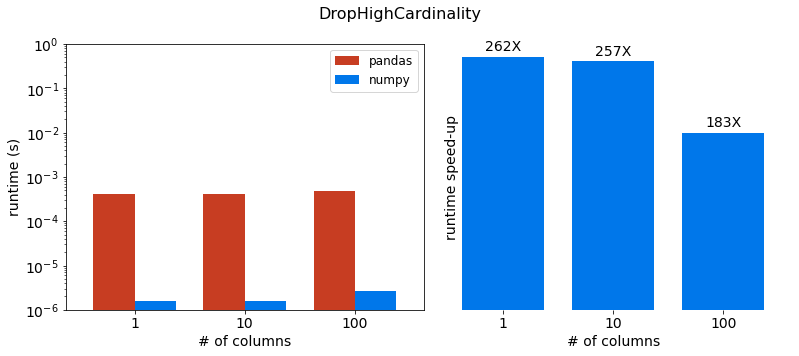

In [41]:
plot_all(bench_scalers, name= "DropHighCardinality")

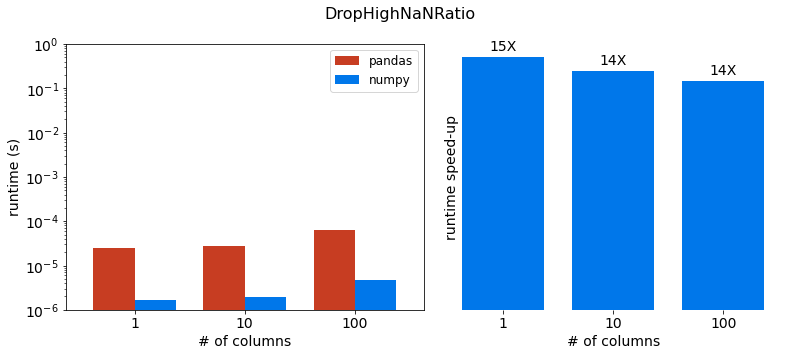

In [42]:
from gators.data_cleaning import DropHighNaNRatio
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropHighNaNRatio(max_ratio=0.5)]
columns = ["Category", "Address", "Resolution"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "DropHighNaNRatio")

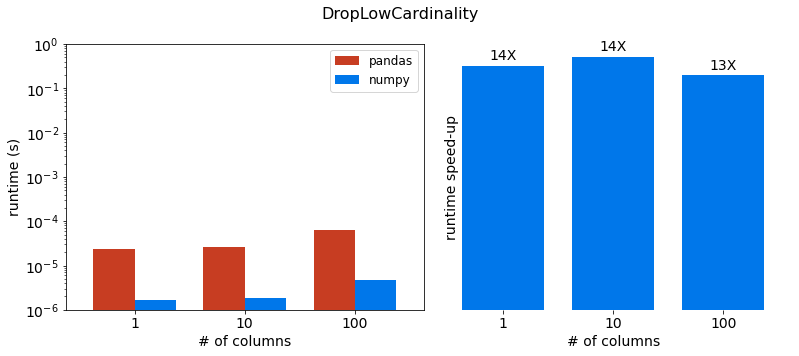

In [43]:
from gators.data_cleaning import DropLowCardinality
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropLowCardinality(min_categories=2)]
columns = ["Category", "Address", "Resolution"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "DropLowCardinality")

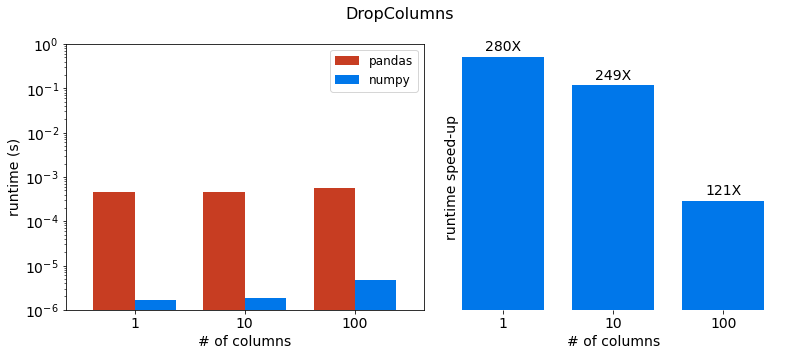

In [44]:
from gators.data_cleaning import DropColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address", "Resolution"]
objs = [DropColumns(columns)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "DropColumns")

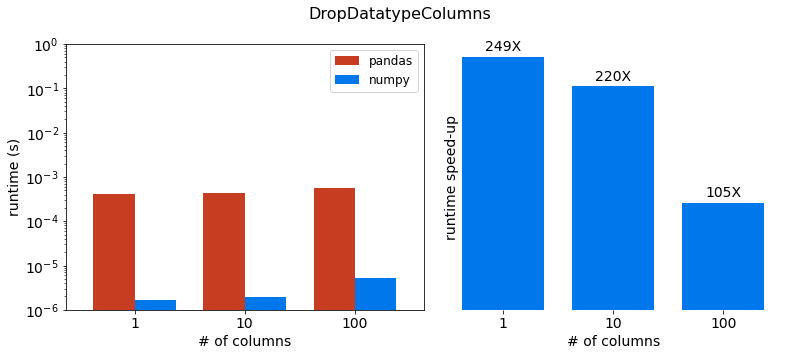

In [45]:
from gators.data_cleaning import DropDatatypeColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address", "Resolution", "X", "Y"]
objs = [DropDatatypeColumns(float)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "DropDatatypeColumns")

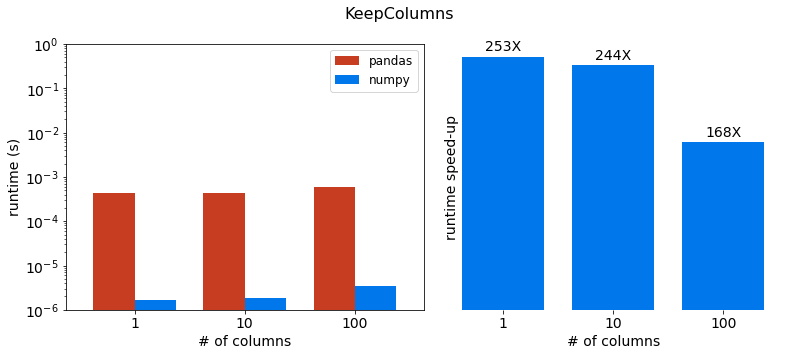

In [46]:
from gators.data_cleaning import KeepColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address", "Resolution", "X", "Y"]
objs = [KeepColumns(["Category", "Address", "Resolution"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "KeepColumns")

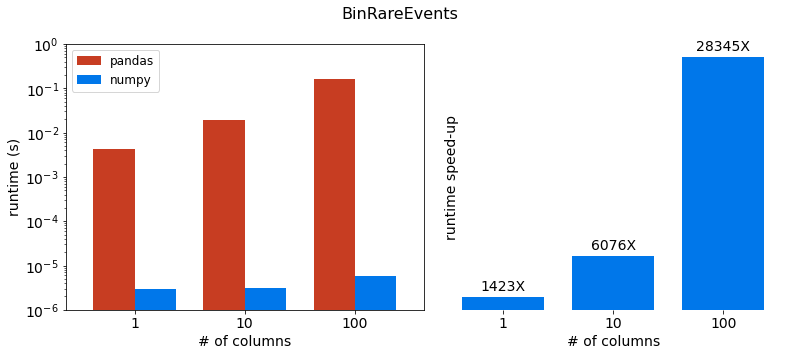

In [47]:
# BINNING STARTS 
# SKIPPED REPLACE
from gators.binning import BinRareEvents
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address", "Resolution"]
objs = [BinRareEvents(min_ratio=0.5)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "BinRareEvents")

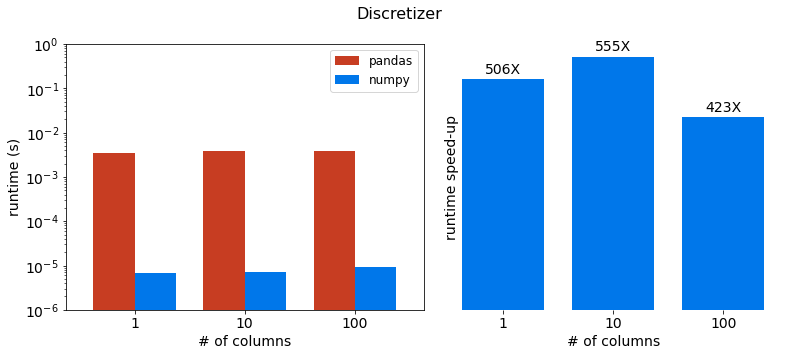

In [48]:
from gators.binning import Discretizer
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address", "Resolution"]
objs = [Discretizer(n_bins=3)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "Discretizer")

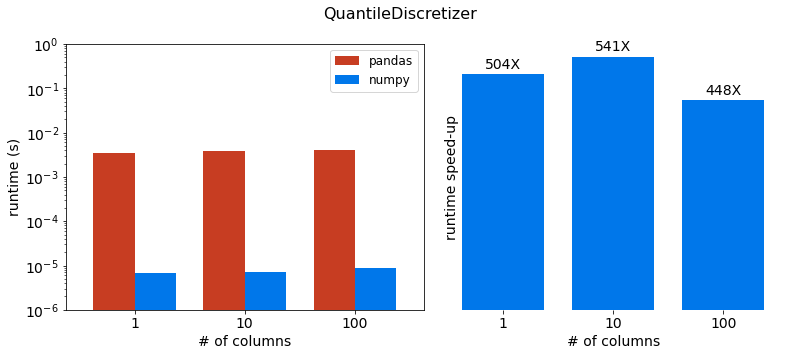

In [49]:
from gators.binning import QuantileDiscretizer
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address", "Resolution"]
objs = [QuantileDiscretizer(n_bins=3)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "QuantileDiscretizer")

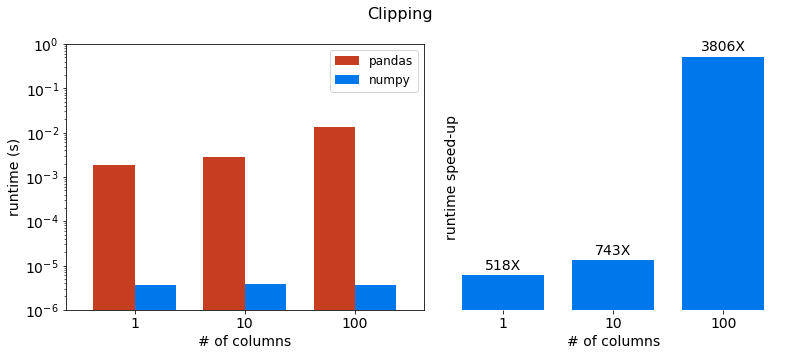

In [50]:
from gators.clipping import Clipping
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df = sf_crime_df[columns]
objs = [Clipping({"X":[-121.5, 122.5], "Y":[37.5, 37.75]})]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "Clipping")

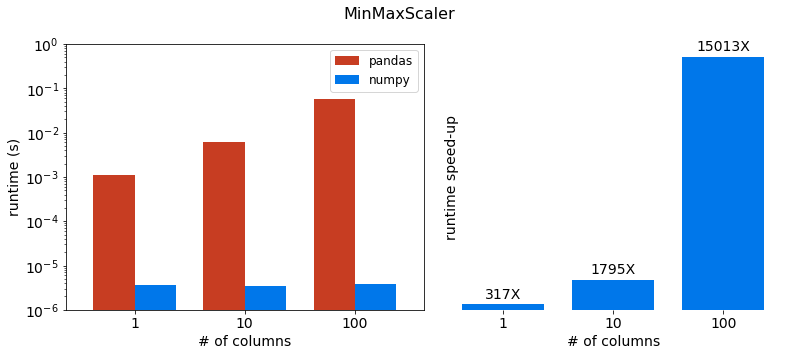

In [51]:
from gators.scalers import MinMaxScaler
housing_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df=housing_df[columns]
objs = [MinMaxScaler()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "MinMaxScaler")

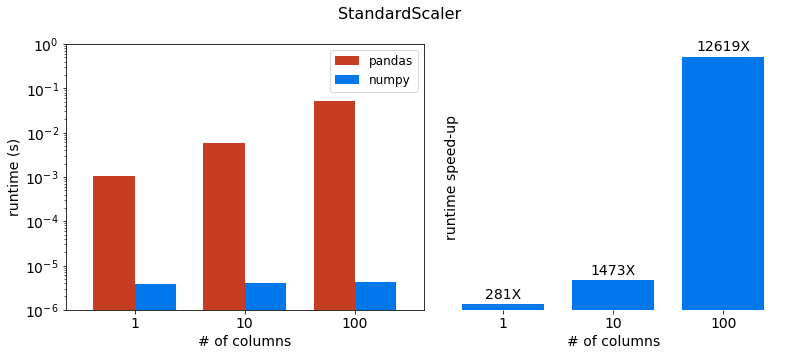

In [52]:
from gators.scalers import StandardScaler
housing_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df=housing_df[columns]
objs = [StandardScaler()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "StandardScaler")

In [21]:
from gators.imputers import FloatImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["LotFrontage"]
housing_df = housing_df[columns]
objs = [FloatImputer(strategy='median')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "FloatImputer")

ValueError: Buffer dtype mismatch, expected 'int64_t' but got 'double'

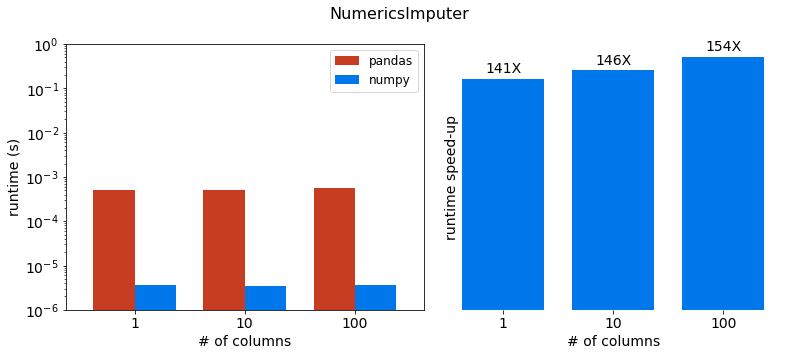

In [54]:
from gators.imputers import NumericsImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrArea", "GarageYrBlt", "LotFrontage"]
housing_df = housing_df[columns]
objs = [NumericsImputer(strategy='median')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "NumericsImputer")

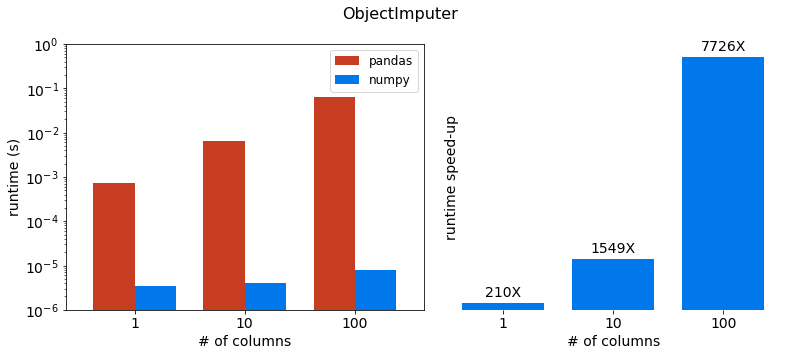

In [55]:
from gators.imputers import ObjectImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrType", "BsmtFinType2", "FireplaceQu"]
housing_df = housing_df[columns]
objs = [ObjectImputer(strategy='most_frequent')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "ObjectImputer")

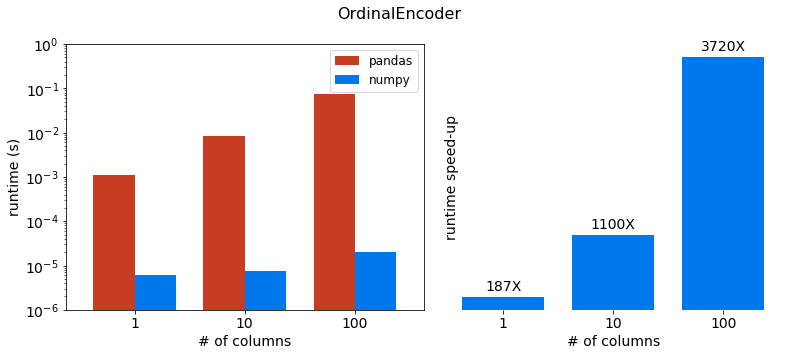

In [56]:
# IMPUTERS 
from gators.encoders import OrdinalEncoder
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OrdinalEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalEncoder")

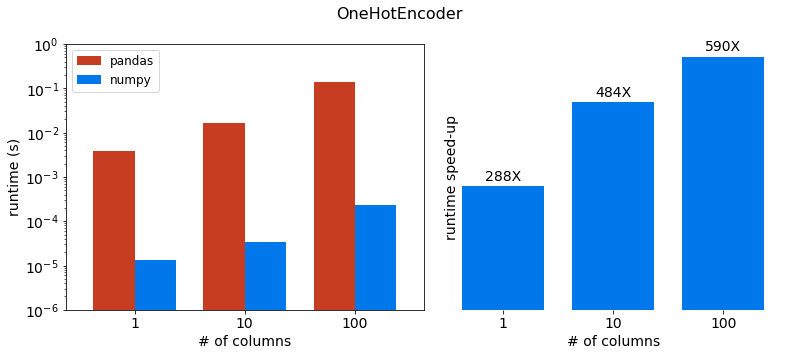

In [57]:
from gators.encoders import OneHotEncoder
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OneHotEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OneHotEncoder")

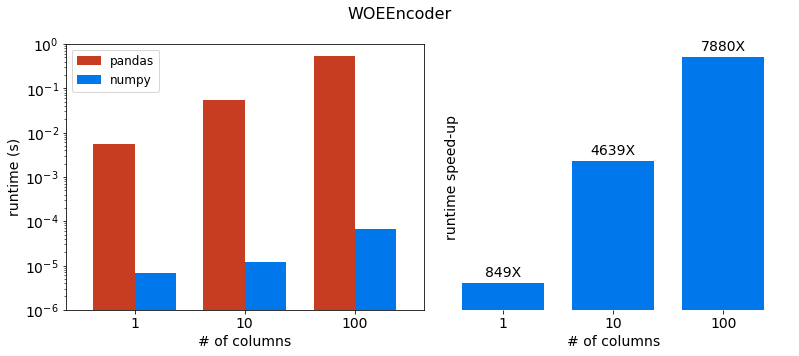

In [58]:
from gators.encoders import WOEEncoder
from gators.imputers import ObjectImputer
titanic_df = pd.read_parquet(titanic_file_location)
imputer = ObjectImputer(strategy='most_frequent')
titanic_df = imputer.fit_transform(titanic_df)
columns = ["Cabin", "Embarked"]
sf_crime_df = titanic_df[columns]
objs = [WOEEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec, y=titanic_df["Survived"])
plot_all(bench_scalers, name= "WOEEncoder")

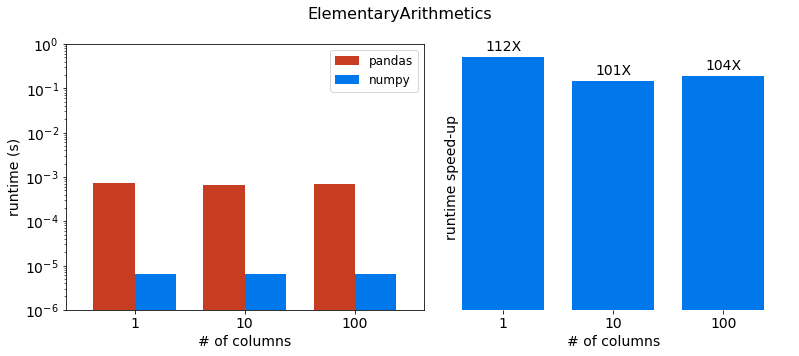

In [59]:
# Feature Generation
# Skipped ClusterStatistics
from gators.feature_generation import ElementaryArithmetics
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
sf_crime_df = sf_crime_df[columns]
# Why filter for columns , even though column names are given in constructor
objs = [ElementaryArithmetics(columns_a=["X"], columns_b=["Y"], operator='+', coef=0.1)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "ElementaryArithmetics")

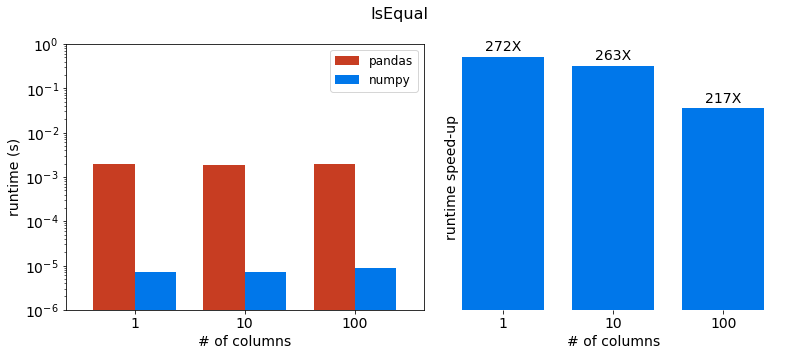

In [60]:
from gators.feature_generation import IsEqual
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [IsEqual(columns_a=["X"], columns_b=["Y"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "IsEqual")

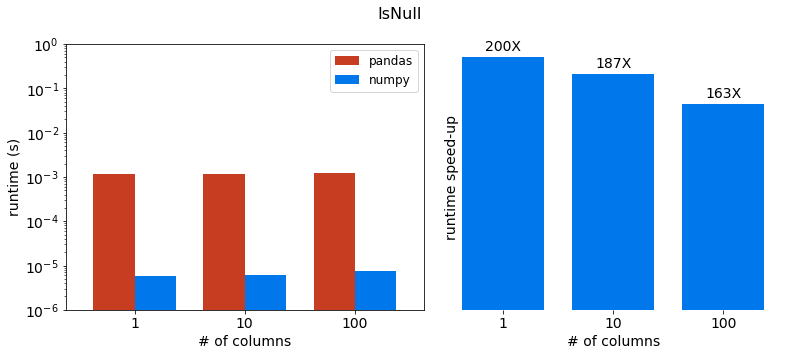

In [61]:
from gators.feature_generation import IsNull
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [IsNull(columns=["X", "Y"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "IsNull")

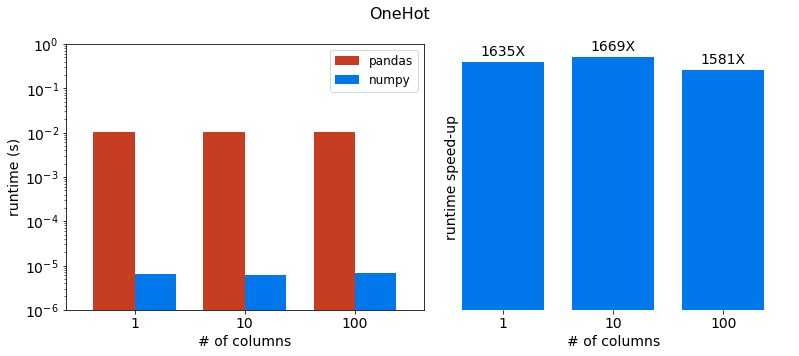

In [62]:
from gators.feature_generation import OneHot
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OneHot(categories_dict={"Category":['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
                                   'VANDALISM', 'NON-CRIMINAL', 'ASSAULT', 'BURGLARY',
                                   'SUSPICIOUS OCC', 'MISSING PERSON']})]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OneHot")

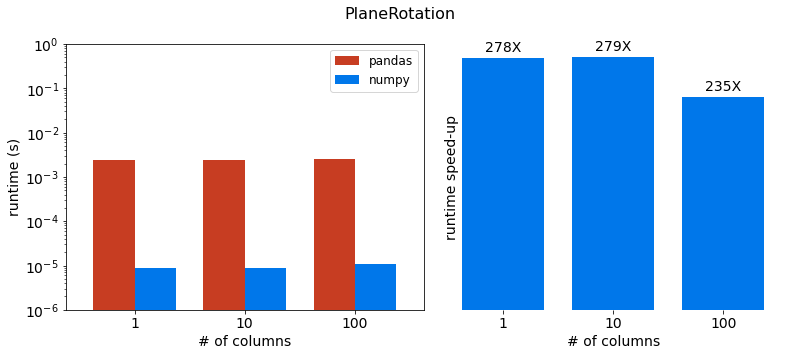

In [63]:
from gators.feature_generation import PlaneRotation
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [PlaneRotation(columns = [['X', 'Y']], theta_vec = [45.0])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "PlaneRotation")
# error in documentation check constructor syntax

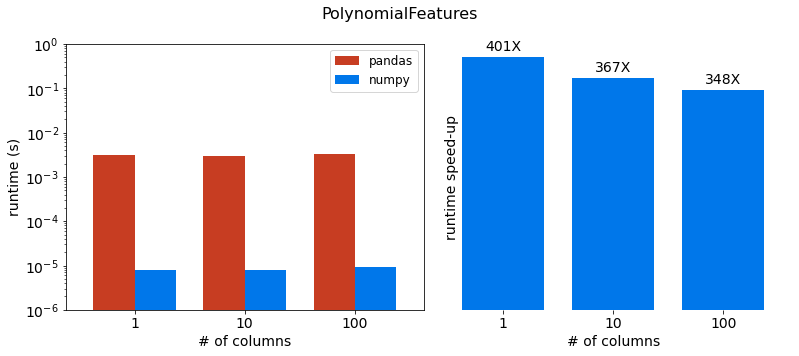

In [64]:
from gators.feature_generation import PolynomialFeatures
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [PolynomialFeatures(columns = ['X', 'Y'])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "PolynomialFeatures")

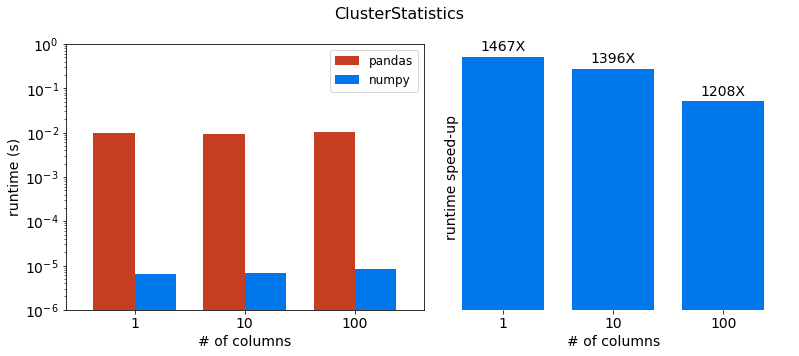

In [65]:
from gators.feature_generation import ClusterStatistics
housing_df = pd.read_parquet(housing_file_location)
columns = ["MSSubClass", "LotArea"]
clusters_dict = {
    'cluster_name_a': columns,
}
objs = [ClusterStatistics(clusters_dict=clusters_dict)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "ClusterStatistics")

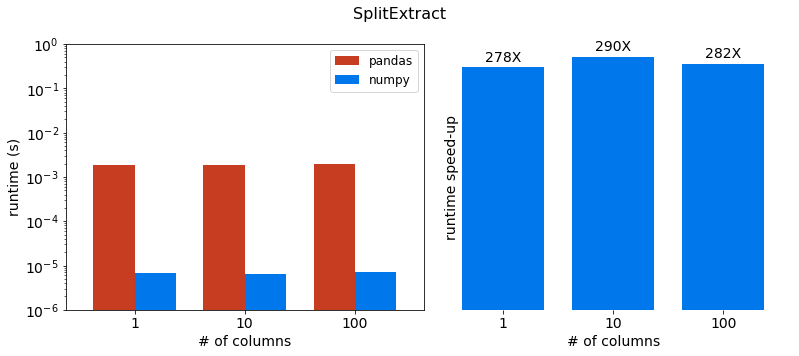

In [66]:
from gators.feature_generation_str import SplitExtract
titanic_df = pd.read_parquet(titanic_file_location)
objs = [SplitExtract(['Name'], [', '], [1], ['Dummy'])]
columns = ["Name"]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "SplitExtract")

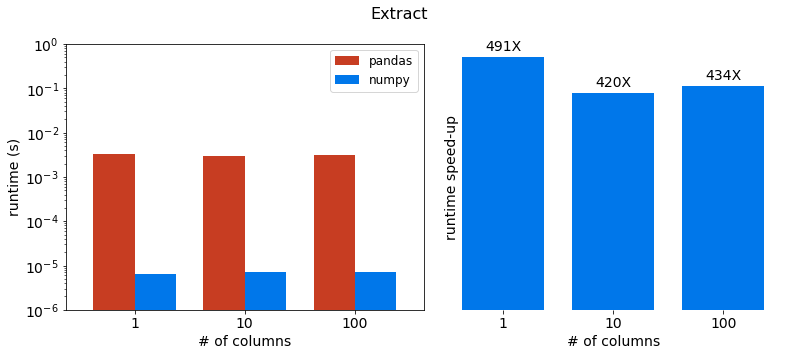

In [67]:
from gators.feature_generation_str import Extract
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [Extract(columns=['Name','Name'], i_min_vec=[0, 2], i_max_vec=[1, 3])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "Extract")

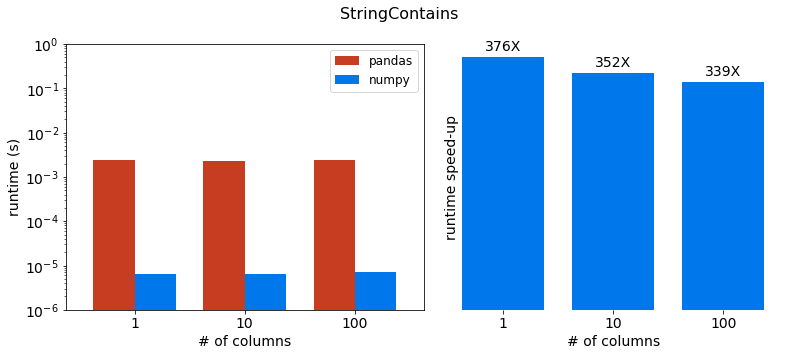

In [68]:
from gators.feature_generation_str import StringContains
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [StringContains(columns=['Name', 'Name'], contains_vec=['Mr', 'Mrs'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "StringContains")

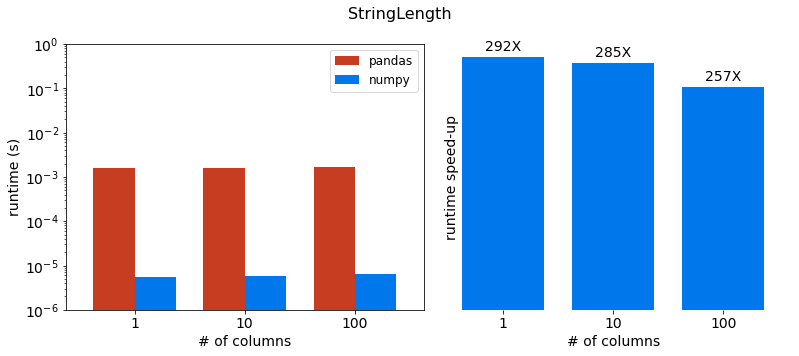

In [69]:
from gators.feature_generation_str import StringLength
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [StringLength(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "StringLength")

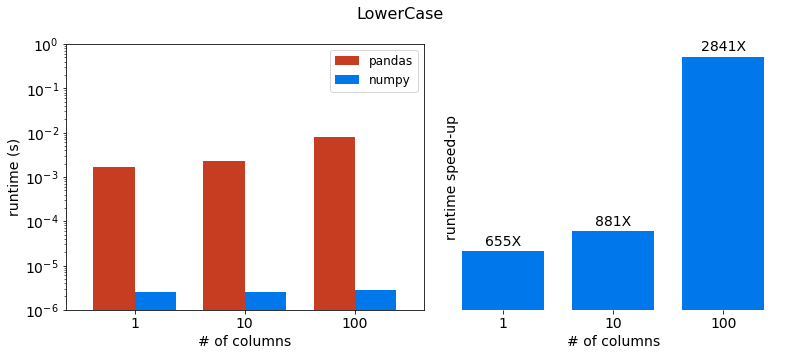

In [70]:
from gators.feature_generation_str import LowerCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [LowerCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "LowerCase")

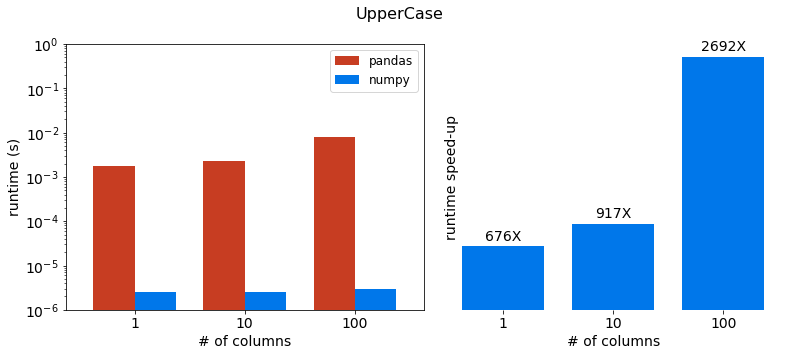

In [71]:
from gators.feature_generation_str import UpperCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [UpperCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "UpperCase")

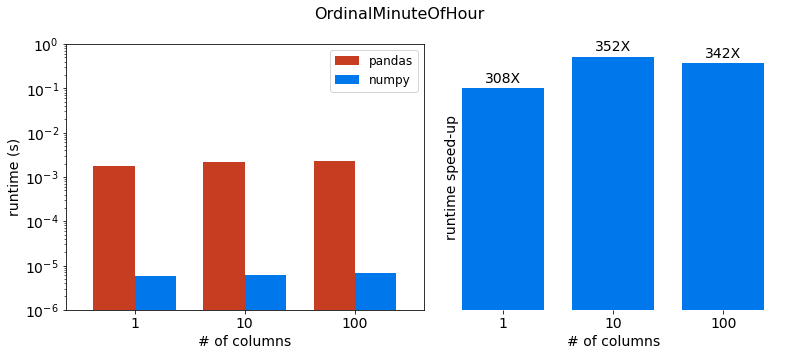

In [72]:
from gators.feature_generation_dt import OrdinalMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [OrdinalMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalMinuteOfHour")

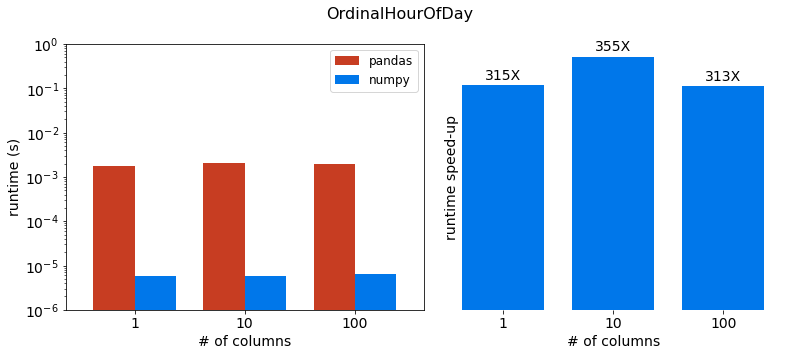

In [73]:
from gators.feature_generation_dt import OrdinalHourOfDay
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [OrdinalHourOfDay(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalHourOfDay")

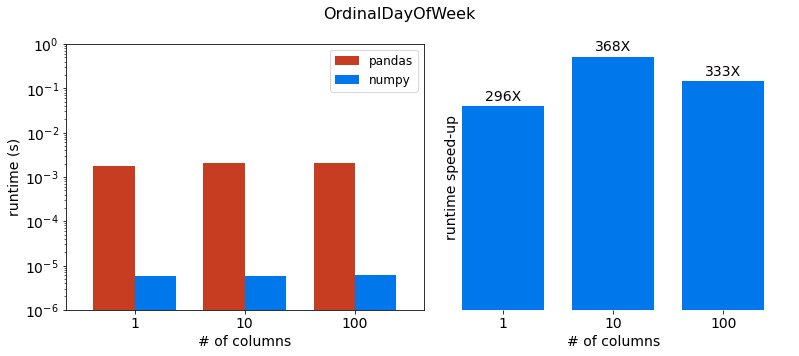

In [74]:
from gators.feature_generation_dt import OrdinalDayOfWeek
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [OrdinalDayOfWeek(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalDayOfWeek")

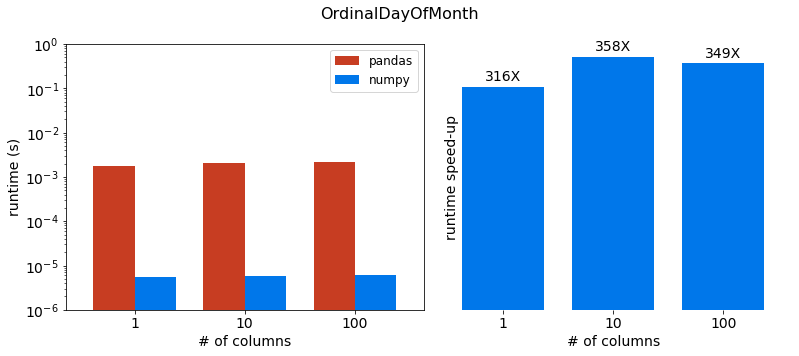

In [75]:
from gators.feature_generation_dt import OrdinalDayOfMonth
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [OrdinalDayOfMonth(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalDayOfMonth")

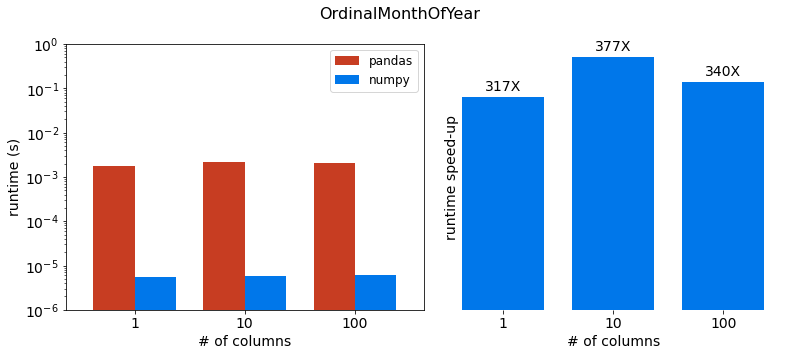

In [76]:
from gators.feature_generation_dt import OrdinalMonthOfYear
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [OrdinalMonthOfYear(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "OrdinalMonthOfYear")

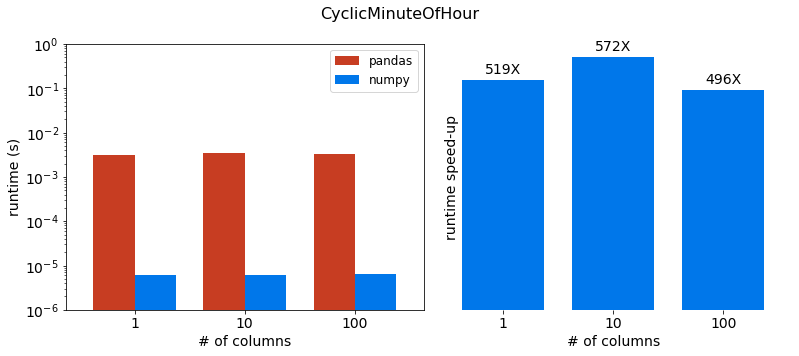

In [77]:
from gators.feature_generation_dt import CyclicMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicMinuteOfHour")

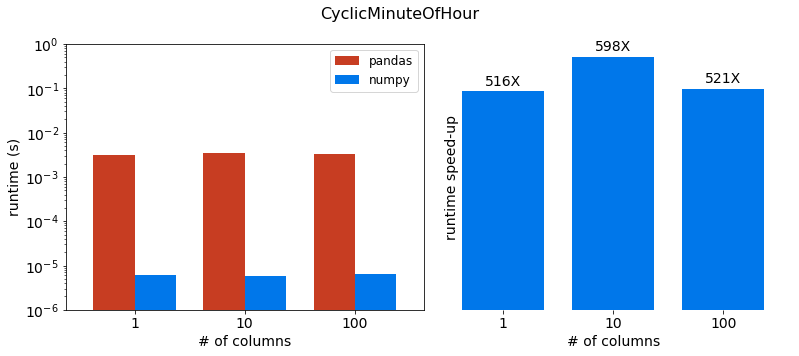

In [78]:
from gators.feature_generation_dt import CyclicMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicMinuteOfHour")

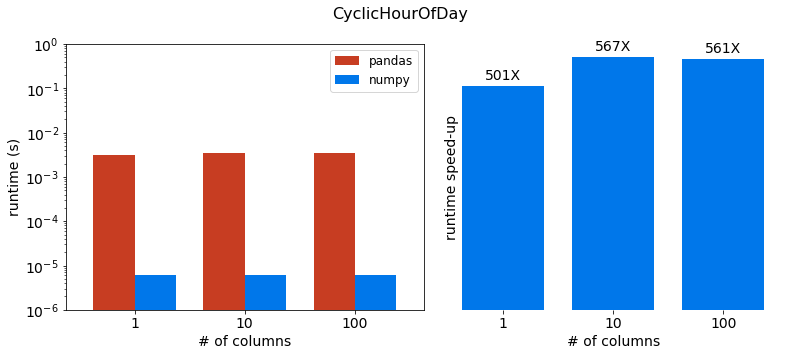

In [79]:
from gators.feature_generation_dt import CyclicHourOfDay
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicHourOfDay(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicHourOfDay")

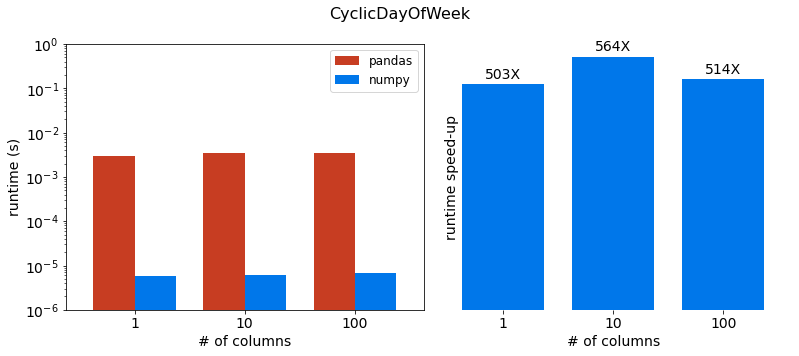

In [80]:
from gators.feature_generation_dt import CyclicDayOfWeek
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicDayOfWeek(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicDayOfWeek")

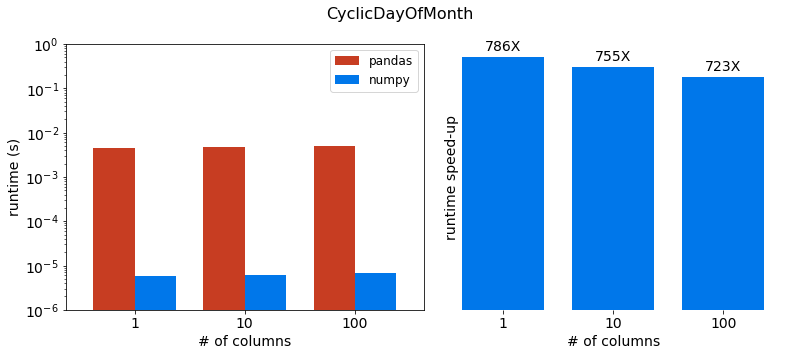

In [81]:
from gators.feature_generation_dt import CyclicDayOfMonth
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicDayOfMonth(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicDayOfMonth")

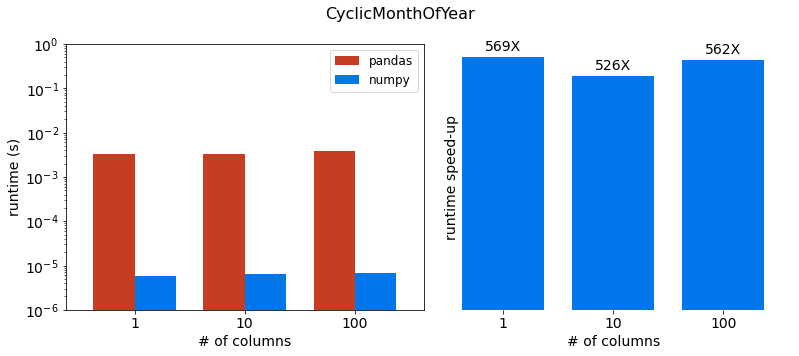

In [82]:
from gators.feature_generation_dt import CyclicMonthOfYear
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [CyclicMonthOfYear(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CyclicMonthOfYear")

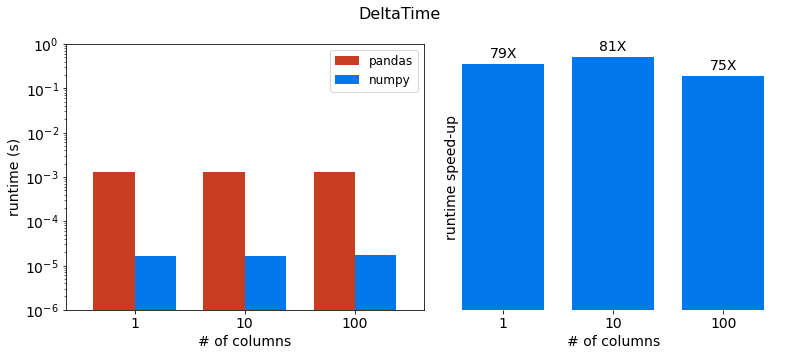

In [83]:
from gators.feature_generation_dt import DeltaTime
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
sf_crime_df["Dates"] = sf_crime_df["Dates"].astype(np.datetime64)
objs = [DeltaTime(columns_a = ["Dates"], columns_b = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "DeltaTime")

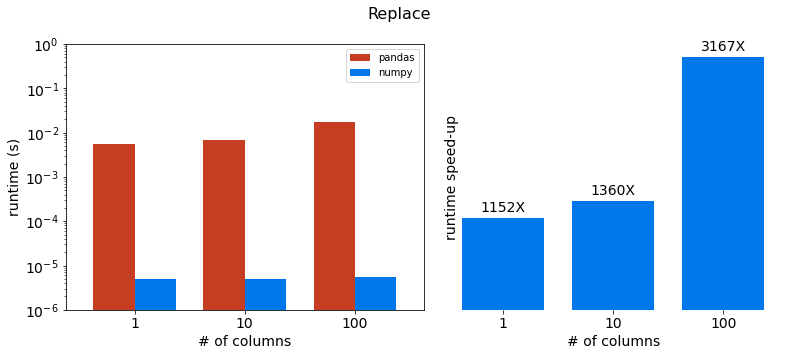

In [15]:
from gators.data_cleaning import Replace
housing_df = pd.read_parquet(housing_file_location)
columns = ["RoofStyle", "HouseStyle"]
to_replace_dict = {'RoofStyle': {'Gable': 'Non-Gable', 'Flat': 'Apartment'}, 'HouseStyle': {'2Story': '2Floors'}}
objs = [Replace(to_replace_dict=to_replace_dict)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "Replace")

In [7]:
housing_df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [16]:
housing_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

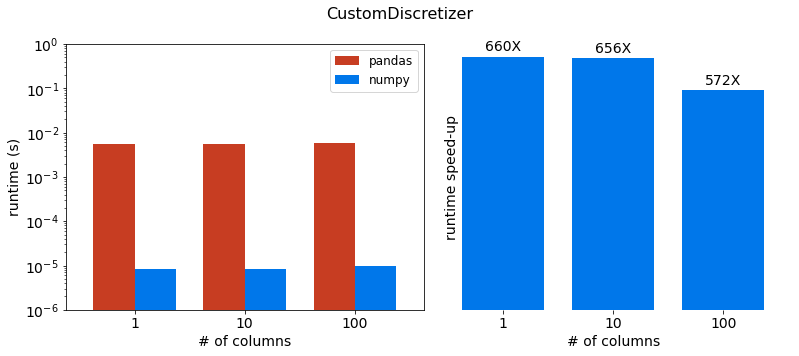

In [17]:
from gators.binning import CustomDiscretizer
bins = {'LotArea':[1300, 13000, 216000]}
column = ["LotArea"]
objs = [CustomDiscretizer(bins=bins)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "CustomDiscretizer")

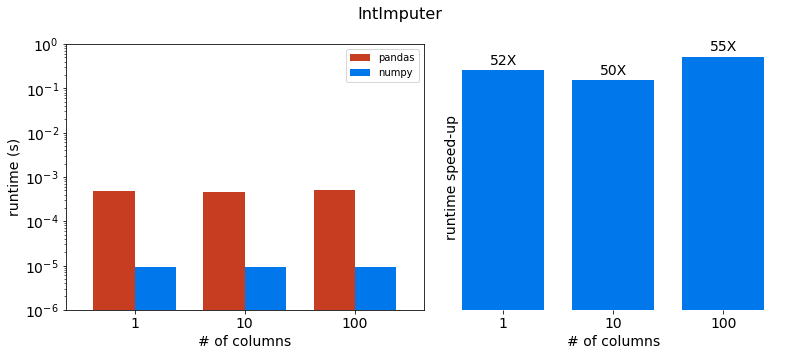

In [6]:
from gators.imputers import IntImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrArea", "GarageYrBlt", "LotFrontage"]
housing_df = housing_df[columns]
objs = [IntImputer(strategy='median')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "IntImputer")

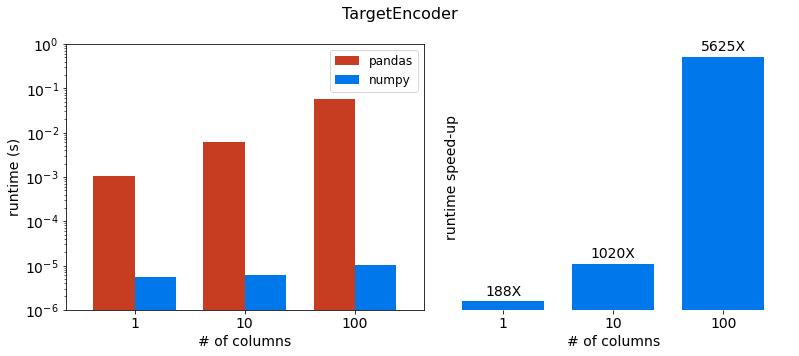

In [19]:
from gators.encoders import TargetEncoder
housing_df = pd.read_parquet(housing_file_location)
y = pd.Series(list(np.random.randint(0, high=2, size=1460)), name='TARGET')
columns = ["RoofStyle"]
housing_df = housing_df[columns]
objs = [TargetEncoder()]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec, y=y)
plot_all(bench_scalers, name= "TargetEncoder")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Survived  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 20.9+ KB
None


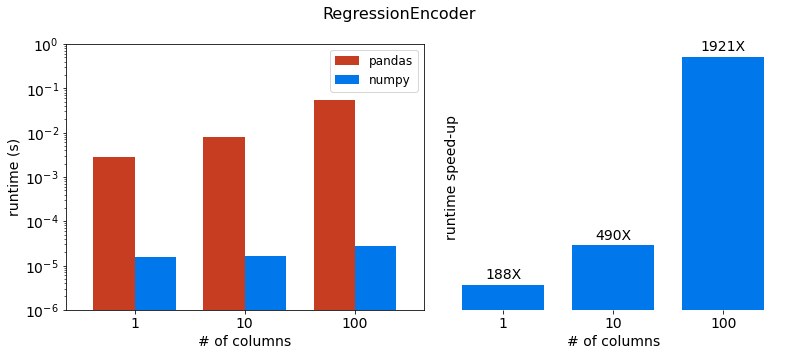

In [47]:
from gators.encoders import RegressionEncoder
from gators.encoders import WOEEncoder
from gators.imputers import ObjectImputer
from gators.binning import QuantileDiscretizer
titanic_df = pd.read_parquet(titanic_file_location)
print(titanic_df.info())
#imputer = ObjectImputer(strategy='most_frequent')
#titanic_df = imputer.fit_transform(titanic_df)
columns = ["Sex", "Survived"]
sf_crime_df = titanic_df[columns]
objs = [RegressionEncoder(encoder=WOEEncoder(), discretizer=QuantileDiscretizer(n_bins=3, inplace=True))]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec, y=titanic_df["Survived"])
plot_all(bench_scalers, name= "RegressionEncoder")

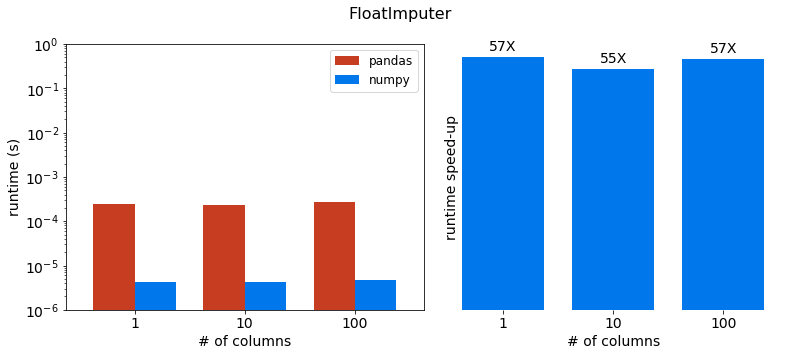

In [8]:
from gators.imputers import FloatImputer
X = pd.DataFrame({'A':[1.0,2.1, np.nan, 2.2]})
columns = ["A"]
objs = [FloatImputer(strategy='mean')]
bench_scalers = benchmark.run_X(objs, X, columns, n_vec=n_vec)
plot_all(bench_scalers, name= "FloatImputer")

In [50]:
housing_df = pd.read_parquet(housing_file_location)

In [9]:
housing_df = pd.read_parquet(housing_file_location)

In [11]:
housing_df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64